# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [31]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head().T  # 观察前几列并转置方便观察

,0,1,2,3,4
world_rank,1,2,3,4,5
institution,Harvard University,Massachusetts Institute of Technology,Stanford University,University of Cambridge,California Institute of Technology
region,USA,USA,USA,United Kingdom,USA
national_rank,1,2,3,1,4
quality_of_education,7,9,17,10,2
alumni_employment,9,17,11,24,29
quality_of_faculty,1,3,5,4,7
publications,1,12,4,16,37
influence,1,4,2,16,22
citations,1,4,2,11,22


In [32]:
data_df.head()

,world_rank,institution,region,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [33]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [34]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 四、模型构建

列出所有的feature

In [35]:
feature_cols

['quality_of_faculty',
 'publications',
 'citations',
 'alumni_employment',
 'influence',
 'quality_of_education',
 'broad_impact',
 'patents']

把数据分成训练集和测试集

In [36]:
all_y = data_df['score'].values
all_x = data_df[feature_cols].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=2020)
all_y.shape, all_x.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape # 检查数据集的形状

((2000,), (2000, 8), (1600, 8), (400, 8), (1600,), (400,))

使用Linear Regression计算模型均方根误差

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)  # 训练模型
p_test = model.predict(X_test)  # 预测测试集
test_error = p_test - y_test  # 计算预测误差
test_rmse = np.sqrt(np.mean(test_error ** 2))  # 计算均方根误差
print(f"rmse:{test_rmse:.4}")  # 输出测试集的均方根误差

rmse:3.999


得到测试集的RMSE为3.999，再百分制的预测目标下是一个可以接受的结果。从评价指标上看貌似我们根据各方面排名较好的综合得分，接下来我们观察学习到的参数，即各指标排名对综合得分的影响权重。

C:\Users\Zames\AppData\Local\Temp\ipykernel_51496\3106644420.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.coef_, y=feature_cols, palette=colors)


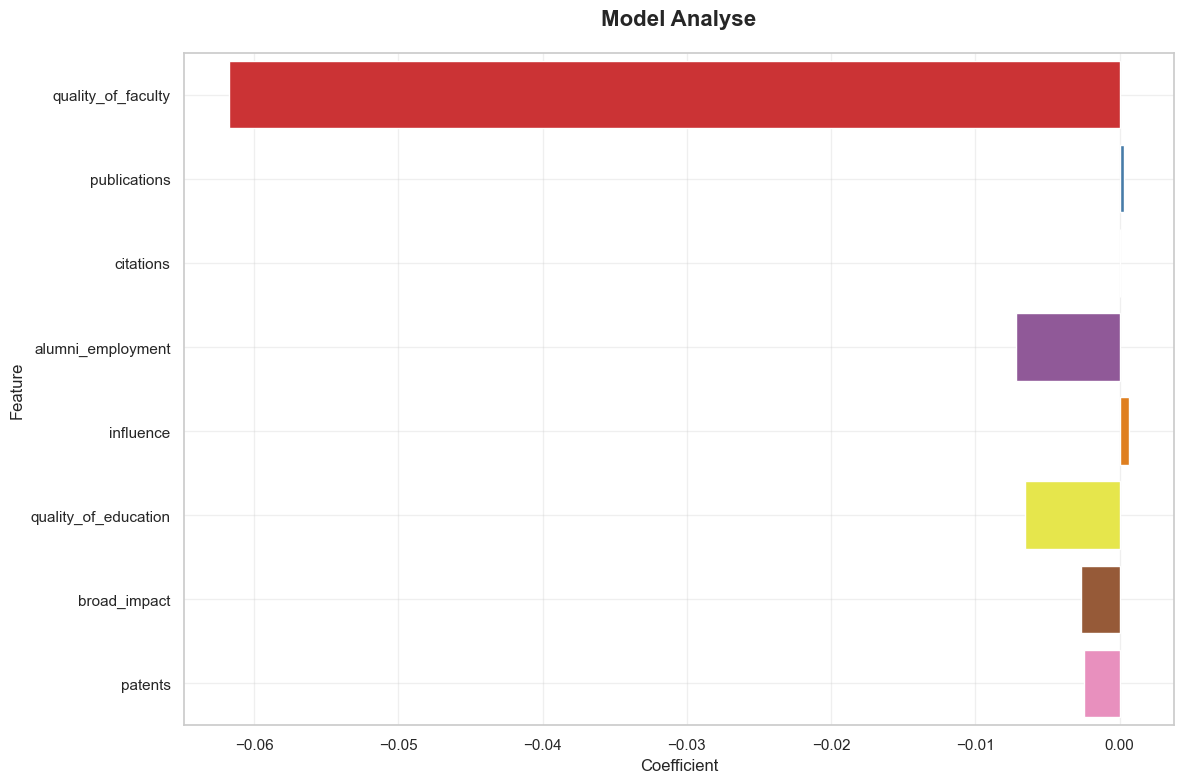

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形大小和样式
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 创建颜色调色板，为每个特征分配不同颜色
colors = sns.color_palette("Set1", len(feature_cols))  # 或者使用 "Set2, viridis", "husl", "rainbow" 等

# 绘制条形图，每个条形不同颜色
sns.barplot(x=model.coef_, y=feature_cols, palette=colors)

# 添加标题和轴标签
plt.title('Model Analyse', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# 添加网格线
plt.grid(True, alpha=0.3)

# 调整布局并显示
plt.tight_layout()
plt.show()

展示线性模型的参数

In [39]:
model.coef_.round(1)

array([-0.1,  0. ,  0. , -0. ,  0. , -0. , -0. , -0. ])

In [40]:
data_df[feature_cols].describe()  # 查看特征的描述性统计信息

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,191.127500,500.415000,449.341500,385.263500,500.21900,296.001500,496.699500,470.321000
std,52.402579,288.674823,250.141228,171.874782,288.30505,106.868798,286.919755,259.625408
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,210.000000,250.750000,234.000000,250.750000,250.75000,250.750000,250.500000,242.750000
50%,210.000000,500.500000,428.000000,478.000000,500.50000,355.000000,496.000000,481.000000
75%,218.000000,750.000000,645.000000,500.250000,750.25000,367.000000,741.000000,737.000000
max,218.000000,1000.000000,812.000000,567.000000,991.00000,367.000000,1000.000000,871.000000


quality_of_faculty似乎是影响学校score的重要因素，我们可以通过seaborn中的regplot()函数观察两个变量之间是否存在关系。这个可以通过散点图的方式实现

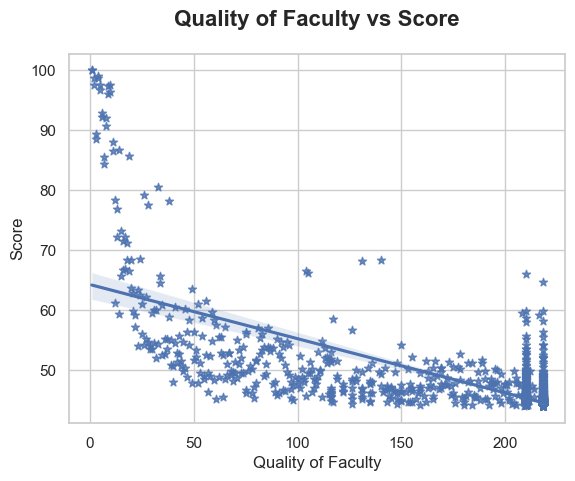

In [41]:
sns.regplot(x='quality_of_faculty',y='score',data=data_df,marker='*')
plt.title('Quality of Faculty vs Score', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quality of Faculty', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.show()

可以看到quality of faculty和score确实有一定的负相关关系，但是明显不是线性的。因此用排名做线性回归(Linear Regresseion)只能得到尚可的结果

## 五、讨论和分析